In [1]:
import logging
import sqlite3
import json
from datetime import datetime

# import numpy as np
import pandas as pd
import numpy as np

# trading_ig
from trading_ig.rest import IGService
from trading_ig.config import config

import yfinance as yf

# plotting
import plotnine as pn
from plotnine import ggplot, aes, geom_col, theme, geom_point,scale_x_continuous ,scale_y_continuous

In [2]:
## Instatiate IG Service

In [3]:
ig_service = IGService(config.username, config.password, config.api_key)
ig = ig_service.create_session()

In [4]:
## Search for a market

In [7]:
results  =ig_service.search_markets('gold')
results.head(3)

,epic,instrumentName,instrumentType,expiry,high,low,percentageChange,netChange,updateTime,updateTimeUTC,bid,offer,delayTime,streamingPricesAvailable,marketStatus,scalingFactor
0,CS.D.USCGC.TODAY.IP,Spot Gold,CURRENCIES,DFB,1857.4,1839.75,-0.61,-11.32,16:17:56,15:17:56,1843.93,1844.43,0,True,TRADEABLE,1
1,MT.D.GC.Month2.IP,Gold,COMMODITIES,AUG-22,1860.4,1841.40,-0.63,-11.70,16:17:49,15:17:49,1846.50,1847.10,0,True,TRADEABLE,1
2,ED.D.4GLDGY.DAILY.IP,Xetra-Gold,SHARES,DFB,5584.0,5513.00,-0.17,-10.00,16:17:56,15:17:56,5515.00,5543.00,0,False,TRADEABLE,1


In [8]:
## Get info about a market

In [9]:
epic ="MT.D.GC.Month2.IP"
market = ig_service.fetch_market_by_epic(epic)
print(f"Keys: {list(market.keys())}")
print(json.dumps(market.instrument,indent=4))

Keys: ['instrument', 'dealingRules', 'snapshot']
{
    "epic": "MT.D.GC.Month2.IP",
    "expiry": "AUG-22",
    "name": "Gold",
    "forceOpenAllowed": true,
    "stopsLimitsAllowed": true,
    "lotSize": 1.0,
    "unit": "AMOUNT",
    "type": "COMMODITIES",
    "controlledRiskAllowed": true,
    "streamingPricesAvailable": true,
    "marketId": "GC",
    "currencies": [
        {
            "code": "USD",
            "symbol": "$",
            "baseExchangeRate": 1.2607116,
            "exchangeRate": 0.66,
            "isDefault": false
        },
        {
            "code": "AUD",
            "symbol": "A$",
            "baseExchangeRate": 1.75637,
            "exchangeRate": 0.45,
            "isDefault": false
        },
        {
            "code": "EUR",
            "symbol": "E",
            "baseExchangeRate": 1.175555,
            "exchangeRate": 0.9,
            "isDefault": false
        },
        {
            "code": "GBP",
            "symbol": "\u00a3",
           

In [10]:
print(json.dumps(market.snapshot,indent=4))


{
    "marketStatus": "TRADEABLE",
    "netChange": -11.9,
    "percentageChange": -0.64,
    "updateTime": "15:18:03",
    "delayTime": 0,
    "bid": 1846.3,
    "offer": 1846.9,
    "high": 1860.4,
    "low": 1841.4,
    "binaryOdds": null,
    "decimalPlacesFactor": 1,
    "scalingFactor": 1,
    "controlledRiskExtraSpread": 0.3
}


## Get historical prices

In [12]:
result = ig_service.fetch_historical_prices_by_epic(epic)
print(f"Keys: {list(result.keys())}")
result['prices']

Exception: error.public-api.exceeded-account-historical-data-allowance

In [31]:
## open a possition
resp = ig_service.create_open_position(
        currency_code='GBP',
        direction='BUY',
        epic=epic,
        order_type='MARKET',
        expiry="AUG-22",
        force_open='false',
        guaranteed_stop='false',
        size=0.5,
        level=None,
        limit_distance=None,
        limit_level=None,
        quote_id=None,
        stop_level=None,
        stop_distance=None,
        trailing_stop=None,
        trailing_stop_increment=None)
resp

{'date': '2022-05-27T14:28:08.975',
 'status': 'OPEN',
 'reason': 'SUCCESS',
 'dealStatus': 'ACCEPTED',
 'epic': 'MT.D.GC.Month2.IP',
 'expiry': 'AUG-22',
 'dealReference': 'JB95SDZL9ZGTYNK',
 'dealId': 'DIAAAAJHSQQFHA9',
 'affectedDeals': [{'dealId': 'DIAAAAJHSQQFHA9', 'status': 'OPENED'}],
 'level': 1859.3,
 'size': 0.5,
 'direction': 'BUY',
 'stopLevel': None,
 'limitLevel': None,
 'stopDistance': None,
 'limitDistance': None,
 'guaranteedStop': False,
 'trailingStop': False,
 'profit': None,
 'profitCurrency': None}

In [53]:
open_positions = ig_service.fetch_open_positions()
open_positions

,contractSize,createdDate,createdDateUTC,dealId,dealReference,size,direction,limitLevel,level,currency,...,percentageChange,netChange,bid,offer,updateTime,updateTimeUTC,delayTime,streamingPricesAvailable,marketStatus,scalingFactor
0,1.0,2022/04/19 13:51:32:000,2022-04-19T12:51:32,DIAAAAH58CM6UAQ,JCXLGYRUU38TYNK,0.5,BUY,None,1967.11,GBP,...,0.12,2.17,1855.95,1856.45,11:31:53,10:31:53,0,True,TRADEABLE,1
1,1.0,2022/05/27 15:28:08:000,2022-05-27T14:28:08,DIAAAAJHSQQFHA9,JB95SDZL9ZGTYNK,0.5,BUY,None,1859.30,GBP,...,0.10,1.90,1859.30,1859.90,11:31:48,10:31:48,0,True,TRADEABLE,1


In [52]:
open_positions

,contractSize,createdDate,createdDateUTC,dealId,dealReference,size,direction,limitLevel,level,currency,...,percentageChange,netChange,bid,offer,updateTime,updateTimeUTC,delayTime,streamingPricesAvailable,marketStatus,scalingFactor
0,1.0,2022/04/19 13:51:32:000,2022-04-19T12:51:32,DIAAAAH58CM6UAQ,JCXLGYRUU38TYNK,0.5,BUY,None,1967.11,GBP,...,0.12,2.22,1856.0,1856.5,11:31:20,10:31:20,0,True,TRADEABLE,1
1,1.0,2022/05/27 15:28:08:000,2022-05-27T14:28:08,DIAAAAJHSQQFHA9,JB95SDZL9ZGTYNK,0.5,BUY,None,1859.30,GBP,...,0.10,1.90,1859.3,1859.9,11:31:17,10:31:17,0,True,TRADEABLE,1


## Account activity

In [49]:
from_date = datetime(2021, 1, 1)
activities = ig_service.fetch_account_activity(from_date=from_date)
activities

,date,epic,period,dealId,channel,type,status,description,details
0,2022-05-27T14:28:08,MT.D.GC.Month2.IP,AUG-22,DIAAAAJHSQQFHA9,PUBLIC_WEB_API,POSITION,ACCEPTED,Position opened: HSQQFHA9,None
1,2022-05-27T14:27:00,MT.D.GC.Month2.IP,DFB,DIAAAAJHSRBPVAY,PUBLIC_WEB_API,POSITION,REJECTED,Rejected: Market not available online,None
2,2022-04-19T12:52:30,CS.D.USCGC.TODAY.IP,DFB,DIAAAAH58CLB6AW,PUBLIC_WEB_API,POSITION,REJECTED,Rejected: Invalid size,None
3,2022-04-19T12:51:32,CS.D.USCGC.TODAY.IP,DFB,DIAAAAH58CM6UAQ,PUBLIC_WEB_API,POSITION,ACCEPTED,Position opened: 58CM6UAQ,None
4,2021-12-29T01:00:42,IX.D.FTSE.DAILY.IP,DFB,DIAAAAHCHLBTCAJ,PUBLIC_WEB_API,POSITION,ACCEPTED,Position/s closed: CHLDWVAK,None
5,2021-12-29T01:00:31,IX.D.FTSE.DAILY.IP,DFB,DIAAAAHCHKYL2AP,PUBLIC_WEB_API,POSITION,ACCEPTED,Position/s closed: CHEUNXA6,None
6,2021-12-29T00:58:56,IX.D.FTSE.DAILY.IP,DFB,DIAAAAHCHLDWVAK,PUBLIC_WEB_API,POSITION,ACCEPTED,Position opened: CHLDWVAK,None
7,2021-12-28T23:56:08,IX.D.FTSE.DAILY.IP,DFB,DIAAAAHCHEUNXA6,PUBLIC_WEB_API,POSITION,ACCEPTED,Position opened: CHEUNXA6,None
8,2021-12-28T23:55:44,IX.D.FTSE.DAILY.IP,DFB,DIAAAAHCHF4YAAS,PUBLIC_WEB_API,POSITION,REJECTED,Rejected: Amount per point below minimum for t...,None
9,2021-12-22T08:02:55,CS.D.GBPUSD.TODAY.IP,DFB,DIAAAAHACA4VTBC,SYSTEM,POSITION,ACCEPTED,Position/s closed: UFMJ49AH,None


In [4]:
## streaming api
from trading_ig import IGService, IGStreamService
from trading_ig.config import config
from trading_ig.lightstreamer import Subscription

In [8]:
import time

updated_df = pd.DataFrame()
def on_update(item):
    print(item)
    
    print("{UPDATE_TIME:<8} {stock_name:<19} Bid {BID:>5} Ask {OFFER:>5}".format(stock_name=item["name"], **item["values"]))


In [ ]:
ig_service = IGService(config.username, config.password, config.api_key, config.acc_type, acc_number=config.acc_number)
ig_stream_service = IGStreamService(ig_service)
ig_stream_service.create_session()
sub = Subscription(mode="MERGE", items=["L1:CS.D.GBPUSD.TODAY.IP"], fields=["UPDATE_TIME", "BID", "OFFER"])
sub.addlistener(on_update)
ig_stream_service.ls_client.subscribe(sub)
ig_stream_service.disconnect()

15:07:25 L1:CS.D.GBPUSD.TODAY.IP Bid 12646.5 Ask 12647.4
15:07:25 L1:CS.D.GBPUSD.TODAY.IP Bid 12646.3 Ask 12647.2
15:07:26 L1:CS.D.GBPUSD.TODAY.IP Bid 12646.4 Ask 12647.3
15:07:26 L1:CS.D.GBPUSD.TODAY.IP Bid 12646.3 Ask 12647.2
15:07:26 L1:CS.D.GBPUSD.TODAY.IP Bid 12646.4 Ask 12647.3
15:07:27 L1:CS.D.GBPUSD.TODAY.IP Bid 12646.3 Ask 12647.2
15:07:28 L1:CS.D.GBPUSD.TODAY.IP Bid 12646.8 Ask 12647.7
15:07:28 L1:CS.D.GBPUSD.TODAY.IP Bid 12646.7 Ask 12647.6
15:07:29 L1:CS.D.GBPUSD.TODAY.IP Bid 12646.4 Ask 12647.9
15:07:29 L1:CS.D.GBPUSD.TODAY.IP Bid 12646.5 Ask 12648.0
15:07:29 L1:CS.D.GBPUSD.TODAY.IP Bid 12647.0 Ask 12647.9
15:07:29 L1:CS.D.GBPUSD.TODAY.IP Bid 12646.6 Ask 12648.1
15:07:30 L1:CS.D.GBPUSD.TODAY.IP Bid 12647.1 Ask 12648.0
15:07:30 L1:CS.D.GBPUSD.TODAY.IP Bid 12647.3 Ask 12648.2
15:07:31 L1:CS.D.GBPUSD.TODAY.IP Bid 12646.9 Ask 12648.4
15:07:31 L1:CS.D.GBPUSD.TODAY.IP Bid 12647.3 Ask 12648.2
15:07:31 L1:CS.D.GBPUSD.TODAY.IP Bid 12647.4 Ask 12648.3
15:07:31 L1:CS.D.GBPUSD.TODAY.I

In [2]:
result = ig_service.fetch_historical_prices_by_epic(
    epic='CS.D.USCGC.TODAY.IP',
    start_date="2022-02-01",
    end_date="2022-02-03",resolution="4H"
    )
result['prices']

NameError: name 'ig_service' is not defined

In [34]:
ig

{'accountType': 'SPREADBET',
 'accountInfo': {'balance': 10643.25,
  'deposit': 46.36,
  'profitLoss': -56.5,
  'available': 10540.39},
 'currencyIsoCode': 'GBP',
 'currencySymbol': '£',
 'currentAccountId': 'Z4JO3H',
 'lightstreamerEndpoint': 'https://demo-apd.marketdatasystems.com',
 'accounts': [{'accountId': 'Z4JO3G',
   'accountName': 'CFD',
   'preferred': False,
   'accountType': 'CFD'},
  {'accountId': 'Z4JO3H',
   'accountName': 'Ezra Spread bet',
   'preferred': True,
   'accountType': 'SPREADBET'}],
 'clientId': '103142528',
 'timezoneOffset': 1,
 'hasActiveDemoAccounts': True,
 'hasActiveLiveAccounts': True,
 'trailingStopsEnabled': False,
 'reroutingEnvironment': None,
 'dealingEnabled': True}

In [4]:
msft = yf.Ticker("MSFT")

In [48]:
# get stock info
print(msft.info.keys())
msft.info['sector']

NameError: name 'msft' is not defined

In [15]:
from datetime import datetime,timedelta
today =datetime.now()#.strftime("%Y-%m-%d")
three_months_ago = today+timedelta(days=-90)

def format_date(date):
    return date.strftime("%Y-%m-%d")

In [16]:
history_raw = msft.history(
    period="1d",
    end = format_date(today),
    start = format_date(three_months_ago)
)
history_raw.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-18,303.442565,309.160722,301.117356,302.025482,42333200,0.0,0
2022-01-19,305.657985,313.262256,302.075397,302.704071,45933900,0.0,0
2022-01-20,308.432248,311.006911,300.518619,300.977661,35380700,0.0,0
2022-01-21,302.065420,303.482473,295.000012,295.419159,57984400,0.0,0
2022-01-24,291.597075,296.496917,275.480375,295.758453,85731500,0.0,0


In [ ]:
(
    ggplot(history_raw)+
    geom_point(aes(x,y))+
    theme()
)   

In [28]:
hist = hist_raw.reset_index().reset_index()

In [ ]:
## Fit a simple linear regression with a quadratic term to the last 3 months, and buy/ sell accordingly

In [58]:
# import statsmodels as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [66]:

X_poly[0:3]

array([[1., 0.],
       [1., 1.],
       [1., 2.]])

In [51]:
import plotnine as pn
from plotnine import ggplot, geom_line, aes

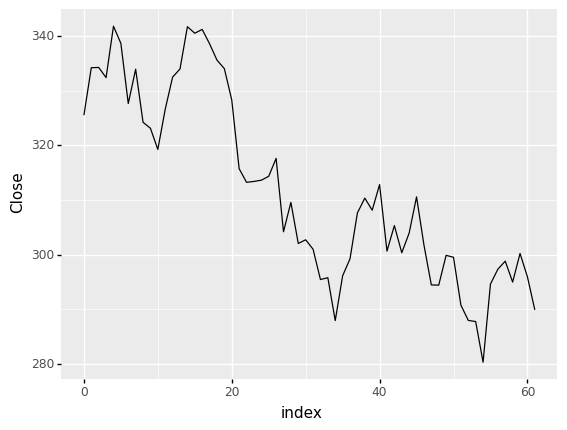

<ggplot: (302096649)>

In [23]:
(
    ggplot(hist.reset_index().reset_index())+
    geom_line(pn.aes('index','Close'))
    )


In [116]:
# np.array(hist['index']).reshape(-1,1)

In [117]:
linreg = LinearRegression()
linreg.fit(np.array(hist['index']).reshape(-1,1),  hist.Close)

LinearRegression()

In [118]:
polyreg =  LinearRegression()
poly =  PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(np.array(hist['index']).reshape(-1,1))
polyreg.fit(X_poly,hist.Close)

LinearRegression()

In [114]:
# inputs = np.linspace(0,60,100)
# poly = PolynomialFeatures(degree = 2)
# inputs = poly.fit_transform(inputs.reshape(-1,1))

# poly = PolynomialFeatures(degree = 3)
# inputs = poly.fit_transform(inputs.reshape(-1,1))



In [140]:
X_poly[:,1]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61.])

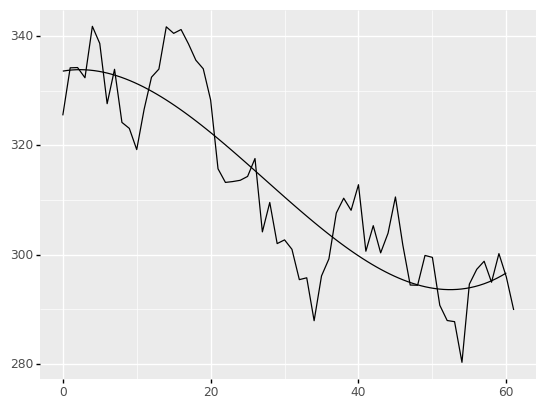

<ggplot: (306785818)>

In [145]:
def plot_model(model = linreg):
    inputs = np.linspace(0,60,100)
    inputs = poly.fit_transform(inputs.reshape(-1,1))

    preds= polyreg.predict(inputs)

    gg = (
        ggplot()+
        geom_line(aes(inputs[:,1],preds))+ # plot the model
        geom_line(aes(hist['index'],hist['Close']))
    )
    return gg

plot_model(polyreg)




In [42]:
linreg.predict(np.array([[1]]))

array([336.047157])